3. In the first cell of your notebook, import the required packages with their customary aliases as follows:

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats as stats
import statsmodels.api as sm

4. At the bottom of your imports cell, use the %matplotlib inline magic command so that your plots show in the notebook without having to call plt.show() every time.

In [2]:
%matplotlib inline

5. Using the pandas read_csv() function, read the GDP dataset into your notebook as a DataFrame called gdp_df.

    Take a look at the first 10 rows.
    Look at the last 5 rows. Do you see a problem?
    Redo the read_csv() call to correct this issue - do not modify the original csv file

In [3]:
gdp_df = pd.read_csv('../data/gdp_per_capita.csv')

In [4]:
gdp_df.head()

,Country or Area,Year,Value,Value Footnotes
0,Afghanistan,2018,1734.723214,NaN
1,Afghanistan,2017,1758.465636,NaN
2,Afghanistan,2016,1757.023490,NaN
3,Afghanistan,2015,1766.593077,NaN
4,Afghanistan,2014,1795.735834,NaN


In [5]:
gdp_df[:9]

,Country or Area,Year,Value,Value Footnotes
0,Afghanistan,2018,1734.723214,NaN
1,Afghanistan,2017,1758.465636,NaN
2,Afghanistan,2016,1757.023490,NaN
3,Afghanistan,2015,1766.593077,NaN
4,Afghanistan,2014,1795.735834,NaN
5,Afghanistan,2013,1807.762344,NaN
6,Afghanistan,2012,1772.764974,NaN
7,Afghanistan,2011,1626.764793,NaN
8,Afghanistan,2010,1671.581238,NaN


In [6]:
gdp_df[:10]

,Country or Area,Year,Value,Value Footnotes
0,Afghanistan,2018,1734.723214,NaN
1,Afghanistan,2017,1758.465636,NaN
2,Afghanistan,2016,1757.023490,NaN
3,Afghanistan,2015,1766.593077,NaN
4,Afghanistan,2014,1795.735834,NaN
5,Afghanistan,2013,1807.762344,NaN
6,Afghanistan,2012,1772.764974,NaN
7,Afghanistan,2011,1626.764793,NaN
8,Afghanistan,2010,1671.581238,NaN
9,Afghanistan,2009,1502.354073,NaN


In [7]:
gdp_df[-5:]

,Country or Area,Year,Value,Value Footnotes
6726,Zimbabwe,1992,2591.007534,NaN
6727,Zimbabwe,1991,2906.272849,NaN
6728,Zimbabwe,1990,2819.549467,NaN
6729,footnoteSeqID,Footnote,NaN,NaN
6730,2,"Excludes South Sudan after July 9, 2011.",NaN,NaN


In [8]:
gdp_df.drop(index=[6729,6730])

,Country or Area,Year,Value,Value Footnotes
0,Afghanistan,2018,1734.723214,NaN
1,Afghanistan,2017,1758.465636,NaN
2,Afghanistan,2016,1757.023490,NaN
3,Afghanistan,2015,1766.593077,NaN
4,Afghanistan,2014,1795.735834,NaN
...,...,...,...,...
6724,Zimbabwe,1994,2768.309953,NaN
6725,Zimbabwe,1993,2572.870395,NaN
6726,Zimbabwe,1992,2591.007534,NaN
6727,Zimbabwe,1991,2906.272849,NaN


In [9]:
gdp_df = pd.read_csv('../data/gdp_per_capita.csv' , skipfooter=2)

<ipython-input-9-c5e928b73d2e>:1: ParserWarning: Falling back to the 'python' engine because the 'c' engine does not support skipfooter; you can avoid this warning by specifying engine='python'.
  gdp_df = pd.read_csv('../data/gdp_per_capita.csv' , skipfooter=2)


In [10]:
gdp_df.tail()

,Country or Area,Year,Value,Value Footnotes
6724,Zimbabwe,1994,2768.309953,NaN
6725,Zimbabwe,1993,2572.870395,NaN
6726,Zimbabwe,1992,2591.007534,NaN
6727,Zimbabwe,1991,2906.272849,NaN
6728,Zimbabwe,1990,2819.549467,NaN


6. Drop the 'Value Footnotes' column, and rename the remaining columns to ‘Country’, ‘Year’, and ‘GDP_Per_Capita’.

In [11]:
gdp_df = gdp_df.drop(columns='Value Footnotes')

In [12]:
gdp_df.head()

,Country or Area,Year,Value
0,Afghanistan,2018,1734.723214
1,Afghanistan,2017,1758.465636
2,Afghanistan,2016,1757.023490
3,Afghanistan,2015,1766.593077
4,Afghanistan,2014,1795.735834


In [13]:
gdp_df = gdp_df.rename(columns={'Country or Area':'Country','Year':'Year','Value':'GDP_Per_Capita'})

In [14]:
gdp_df.head()

,Country,Year,GDP_Per_Capita
0,Afghanistan,2018,1734.723214
1,Afghanistan,2017,1758.465636
2,Afghanistan,2016,1757.023490
3,Afghanistan,2015,1766.593077
4,Afghanistan,2014,1795.735834




7.How many rows and columns does gdp_df have? What are the data types of its columns? If any of the columns are not the expected types, figure out why and fix it.


In [15]:
gdp_df.shape

(6729, 3)

In [16]:
gdp_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6729 entries, 0 to 6728
Data columns (total 3 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Country         6729 non-null   object 
 1   Year            6729 non-null   int64  
 2   GDP_Per_Capita  6729 non-null   float64
dtypes: float64(1), int64(1), object(1)
memory usage: 157.8+ KB


8. 

Which years are represented in this dataset? Take a look at the number of observations per year. What do you notice?


In [17]:
gdp_df['Year'].min()

1990

In [18]:
gdp_df['Year'].max()

2018

In [19]:
print(gdp_df['Year'])

0       2018
1       2017
2       2016
3       2015
4       2014
        ... 
6724    1994
6725    1993
6726    1992
6727    1991
6728    1990
Name: Year, Length: 6729, dtype: int64


In [20]:
gdp_df.groupby(['Year']).size()

Year
1990    210
1991    211
1992    213
1993    215
1994    218
1995    224
1996    224
1997    226
1998    227
1999    228
2000    236
2001    237
2002    238
2003    238
2004    238
2005    238
2006    238
2007    239
2008    240
2009    241
2010    241
2011    243
2012    241
2013    241
2014    240
2015    240
2016    239
2017    239
2018    226
dtype: int64

the number of countries involved was much lower in 1990 than the mid 200s and dropped significantly from 2017-2018

9. 

How many countries are represented in this dataset? Which countries are least represented in the dataset? Why do you think these countries have so few observations?


In [21]:
gdp_df.groupby(['Country']).size()

Country
Afghanistan            17
Albania                29
Algeria                29
Angola                 29
Antigua and Barbuda    29
                       ..
West Bank and Gaza     25
World                  29
Yemen                  29
Zambia                 29
Zimbabwe               29
Length: 243, dtype: int64

In [22]:
country = gdp_df.groupby(['Country']).size().reset_index(name='Counts')

In [23]:
country.sort_values('Counts')

,Country,Counts
51,Djibouti,1
199,South Sudan,8
225,Turks and Caicos Islands,8
191,Sint Maarten (Dutch part),9
153,Nauru,12
...,...,...
91,IBRD only,29
92,IDA & IBRD total,29
93,IDA blend,29
130,"Macao SAR, China",29


there are 243 countries represented. the lesser counted countries might not have been recognized or a part of the UN. they also could have only been countries for a short time before either breaking up or being merged into another existing country



10. Create a new dataframe by subsetting gdp_df to just the year 2014. Call this new dataframe gdp_2014.


In [24]:
gdp_2014 = gdp_df[gdp_df['Year'] == 2014]

In [25]:
gdp_2014.head()

,Country,Year,GDP_Per_Capita
4,Afghanistan,2014,1795.735834
21,Albania,2014,10700.993216
50,Algeria,2014,13557.769757
79,Angola,2014,6813.052106
108,Antigua and Barbuda,2014,20440.540555


11. 

Use .describe() to find the summary statistics for GDP per capita in 2014.


In [26]:
gdp_2014['GDP_Per_Capita'].describe()

count       240.000000
mean      18034.303556
std       19320.930599
min         672.681648
25%        4301.187365
50%       11868.067810
75%       24388.408410
max      130439.106674
Name: GDP_Per_Capita, dtype: float64



12. Create a histogram of GDP Per Capita numbers for 2014 (you may wish to adjust the number of bins for your histogram). How would you describe the shape of the distribution?


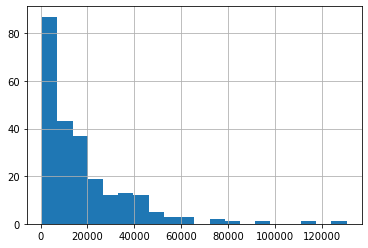

In [27]:
gdp_2014['GDP_Per_Capita'].hist(bins=20)

the distribution of this chart is right leaning.



13. Find the top 5 counties and bottom 5 countries by GDP per capita in 2014.


In [28]:
gdp_2014.sort_values('GDP_Per_Capita', ascending=False)

,Country,Year,GDP_Per_Capita
3639,"Macao SAR, China",2014,130439.106674
5003,Qatar,2014,116693.507701
3610,Luxembourg,2014,92349.186429
5316,Singapore,2014,81965.361071
707,Brunei,2014,76448.593329
...,...,...,...
3697,Malawi,2014,1142.530804
4414,Niger,2014,900.136918
1375,Dem. Rep. Congo,2014,784.872656
794,Burundi,2014,768.469837


top 5 GDP countries: China, Qatar, Luxembourg, Singapore, Brunei

bottom 5 GDP countries: Malawi, Niger, Dem. Rep. Congo, Burundi, Central African Republic

14. 

Now, return to the full dataset, gdp_df. Pivot the data for 1990 and 2017 (using the pandas .pivot_table() method or another method) so that each row corresponds to a country, each column corresponds to a year, and the values in the table give the GDP_Per_Capita amount. Drop any rows that are missing values for either 1990 or 2017. Save the result to a dataframe named gdp_pivoted.


In [29]:
gdp_pivoted = gdp_df.pivot_table(values='GDP_Per_Capita',index='Country',columns='Year',dropna=True)

In [30]:
gdp_pivoted.head()

Year,1990,1991,1992,1993,1994,1995,1996,1997,1998,1999,...,2009,2010,2011,2012,2013,2014,2015,2016,2017,2018
Country,,,,,,,,,,,,,,,,,,,,,
Afghanistan,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,1502.354073,1671.581238,1626.764793,1772.764974,1807.762344,1795.735834,1766.593077,1757.023490,1758.465636,1734.723214
Albania,4458.247115,3229.250120,3015.391377,3323.864388,3622.007101,4129.975340,4533.894357,4064.132804,4450.922523,5056.566515,...,9525.377979,9927.638204,10207.752347,10369.561032,10492.669028,10700.993216,10970.321401,11352.101422,11796.719185,12316.071501
Algeria,10300.015042,9929.097717,9873.024864,9453.323181,9176.235569,9344.748909,9558.822868,9509.123393,9845.209222,10017.374034,...,12697.690780,12919.491054,13046.128511,13229.008711,13329.770758,13557.769757,13774.758920,13926.910489,13822.389087,13737.356063
Angola,4761.229638,4651.204299,4238.318419,3118.903488,3060.336207,3407.974524,3747.164004,3892.473420,3945.594930,3902.774196,...,6292.534856,6360.441938,6346.395122,6645.085625,6730.945822,6813.052106,6644.857255,6258.376628,6044.972035,5725.327238
Antigua and Barbuda,17454.549799,17598.378401,17497.380127,18055.500956,18851.937822,17645.173769,18407.710553,19000.281878,19486.171892,19816.291441,...,22568.626530,20555.414205,19876.215323,20283.897534,19918.131682,20440.540555,20994.725890,21923.796037,22400.379562,23840.729896


In [31]:
gdp_pivoted[1990]

Country
Afghanistan                     NaN
Albania                 4458.247115
Algeria                10300.015042
Angola                  4761.229638
Antigua and Barbuda    17454.549799
                           ...     
West Bank and Gaza              NaN
World                   8966.014072
Yemen                   3425.707169
Zambia                  2339.137959
Zimbabwe                2819.549467
Name: 1990, Length: 243, dtype: float64

In [32]:
gdp_pivoted = gdp_pivoted[[1990,2017]]

In [33]:
gdp_pivoted.head()

Year,1990,2017
Country,,
Afghanistan,NaN,1758.465636
Albania,4458.247115,11796.719185
Algeria,10300.015042,13822.389087
Angola,4761.229638,6044.972035
Antigua and Barbuda,17454.549799,22400.379562


In [34]:
gdp_pivoted = gdp_pivoted.dropna()

15. 

Create a new column in gdp_pivoted named Percent_Change. This column should contain the percent change in GDP_Per_Capita from 1990 to 2017. Hint: Percent change is calculated as 100*(New Value - Old Value) / Old Value.


In [35]:
gdp_pivoted['Percent_Change'] = 100 * (gdp_pivoted[2017]-gdp_pivoted[1990])/gdp_pivoted[1990]



16. How many countries experienced a negative percent change in GDP per capita from 1990 to 2017?


In [36]:
gdp_pivoted[gdp_pivoted['Percent_Change']<0].count()

Year
1990              20
2017              20
Percent_Change    20
dtype: int64

17. Which country had the highest % change in GDP per capita? Create a line plot showing this country's GDP per capita for all years from 1990 to 2017. Create another showing the country with the second highest % change in GDP. How do the trends in these countries compare?

In [39]:
gdp_pivoted['Percent_Change'].max()

2090.973464237512

In [41]:
gdp_pivoted['Percent_Change'].sort_values()

Country
Dem. Rep. Congo                                 -41.759785
United Arab Emirates                            -40.829500
Burundi                                         -34.710993
Yemen                                           -29.812379
Ukraine                                         -24.440266
                                                  ...     
East Asia & Pacific (IDA & IBRD)                509.209651
East Asia & Pacific (excluding high income)     509.437318
Myanmar                                         668.297629
China                                           902.257241
Equatorial Guinea                              2090.973464
Name: Percent_Change, Length: 209, dtype: float64

Equatorial Guinea had the biggest percent change at 2090% growth

TO LEXA: This below is me trying something different but it's not what I want to hand in/isn't ready yet.

In [85]:
EG_China_gdp = gdp_df[(gdp_df['Country']=='Equatorial Guinea')|(gdp_df['Country']=='China')]

In [86]:
EG_China_gdp['Country'].unique()

array(['China', 'Equatorial Guinea'], dtype=object)

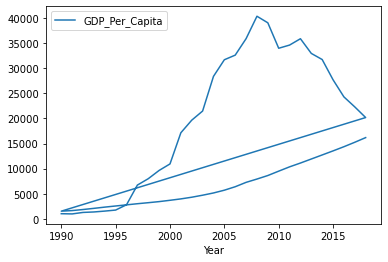

In [87]:
EG_China_gdp.plot(x='Year',y='GDP_Per_Capita')

TO LEXA: This is what I have working so far

In [88]:
Equatorial_Guinea = gdp_df[gdp_df['Country']=='Equatorial Guinea']

In [52]:
China_gdp = gdp_df[gdp_df['Country']=='China']

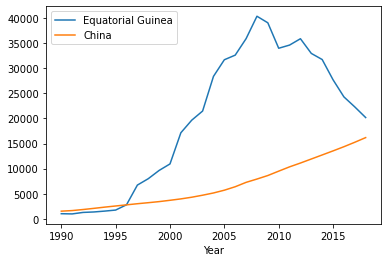

In [92]:
ax = Equatorial_Guinea.plot(x='Year',y='GDP_Per_Capita',label='Equatorial Guinea')
China_gdp.plot(ax=ax,x='Year',y='GDP_Per_Capita',label='China');

both have had steady growth from 1990-around 2008 however Equatorial Guinea has seen much larger growth as their y axis (GDP per capita) starts at almost 0 and shoots up to 40,000 at its peak. China starts around 2000 and has been slowly growing towards 16,0000. The range of the two graphs is vastly different.



18. Read in continents.csv contained in the data folder into a new dataframe called continents. We will be using this dataframe to add a new column to our dataset.


In [57]:
continents = pd.read_csv('../data/continents.csv')



19. Merge gdp_df and continents. Keep only the countries that appear in both data frames. Save the result back to gdp_df.


In [59]:
gdp_df = gdp_df.merge(continents, on='Country')

In [60]:
gdp_df.head()

,Country,Year,GDP_Per_Capita,Continent
0,Afghanistan,2018,1734.723214,Asia
1,Afghanistan,2017,1758.465636,Asia
2,Afghanistan,2016,1757.023490,Asia
3,Afghanistan,2015,1766.593077,Asia
4,Afghanistan,2014,1795.735834,Asia




20. Determine the number of countries per continent. Create a bar chart showing this.


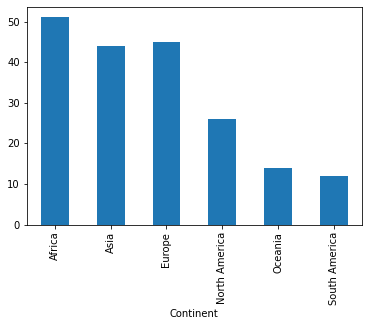

In [94]:
gdp_df.groupby(['Continent'])['Country'].nunique().plot(kind='bar');



21. Creat a seaborn boxplot showing GDP per capita in 2014 split out by continent. What do you notice?


In [95]:
gdp_2014 = gdp_df[gdp_df['Year'] == 2014]

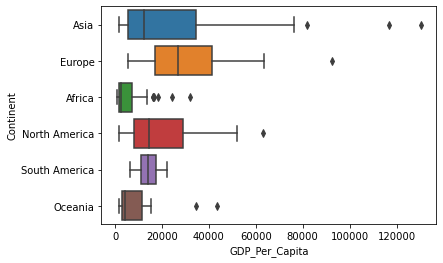

In [106]:
sns.boxplot(y='Continent',x='GDP_Per_Capita',data=gdp_2014);

Asia has a few very high outliers whereas Europe, North America, and South America seem to have similar GDPs. Africa, South America, and Oceania all have fairly small boxes meaning their country's GDPs are the most similar to each other.



22. Read in internet_use.csv into a DataFrame called internet_df. You will most likely get an error message when doing this - figure out what is going wrong and fix it. Take a look at the first and last five rows and make any corrections to your read_csv() call to fix this. Again, do not modify the original datasets.


In [114]:
internet_df = pd.read_csv('../data/internet_use.csv',error_bad_lines=False)

b'Skipping line 4675: expected 4 fields, saw 6\n'


In [116]:
internet_df.head()

,Country or Area,Year,Value,Value Footnotes
0,Afghanistan,2014,6.390000,NaN
1,Afghanistan,2013,5.900000,NaN
2,Afghanistan,2012,5.454545,NaN
3,Afghanistan,2011,5.000000,NaN
4,Afghanistan,2010,4.000000,NaN


In [115]:
internet_df.tail()

,Country or Area,Year,Value,Value Footnotes
4670,175,Includes individuals 3 years and older,NaN,NaN
4671,176,NTIA/CPS survey.,NaN,NaN
4672,178,Estimated based on Survey's results. Populatio...,NaN,NaN
4673,179,Preliminary. Country estimate.,NaN,NaN
4674,180,The methodology used to estimated the figure f...,NaN,NaN


In [125]:
internet_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4675 entries, 0 to 4674
Data columns (total 4 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Country or Area  4675 non-null   object 
 1   Year             4675 non-null   object 
 2   Value            4495 non-null   float64
 3   Value Footnotes  948 non-null    float64
dtypes: float64(2), object(2)
memory usage: 146.2+ KB


In [124]:
internet_df.drop(internet_df.tail(15).index)

,Country or Area,Year,Value,Value Footnotes
0,Afghanistan,2014,6.390000,NaN
1,Afghanistan,2013,5.900000,NaN
2,Afghanistan,2012,5.454545,NaN
3,Afghanistan,2011,5.000000,NaN
4,Afghanistan,2010,4.000000,NaN
...,...,...,...,...
4655,160,Population age 16-74 using in the last 3 months.,NaN,NaN
4656,161,Population age 15-74.,NaN,NaN
4657,162,Population age 15-74.\r\n,NaN,NaN
4658,163,Population age 6+. Slight break in comparabili...,NaN,NaN


TO LEXA: you're trying to drop the last rows that aren't listing a year/country